In [364]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import statistics as st

In [365]:
df = pd.read_csv('sample data\\bengaluru_house_prices.csv',)
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [366]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [367]:
df = pd.read_csv('sample data\\bengaluru_house_prices.csv', usecols=['location','size','total_sqft','bath','balcony','price'])
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


# [ step 1, 2, 3 ]  load data, find missing value, fill missing value 

In [368]:
df.shape

(13320, 6)

In [369]:
len(df.location.unique())

1306

In [370]:
df1 = df.copy()
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [371]:
df1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [372]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [373]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [374]:
df1.shape

(13320, 6)

In [375]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [376]:
pd.DataFrame(df1['size'].apply(lambda x : str(x).split(' ')[0]))

,size
0,2
1,4
2,3
3,3
4,2
...,...
13315,5
13316,4
13317,2
13318,4


In [377]:
df1['size'] = pd.DataFrame(df1['size'].apply(lambda x : str(x).split(' ')[0]))

In [378]:
df1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,0.0,231.00
13316,Richards Town,4,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [379]:
df1['size'] = df1['size'].apply(lambda x : float(x))

In [380]:
df1['size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [381]:
int(df1['size'].mean())

2

In [382]:
df1['size'] = df1['size'].fillna(int(df1['size'].mean()))

In [383]:
df1.isnull().sum()

location        1
size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

# fill missing value in total_sqft

In [384]:
df2 = df1.copy()

In [385]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [386]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [387]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Richards Town,4.0,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4.0,4689,4.0,1.0,488.00


In [388]:
type(df2['total_sqft'][0])

str

In [389]:
def convert_sqft_to_num(x):
    token = x.split(' - ')
    if len(token)==2:
        return ((float(token[0]) + float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [390]:
print(convert_sqft_to_num('125'))
print(type(convert_sqft_to_num('125')))
print()

print(convert_sqft_to_num('1133 - 1384'))
print(type(convert_sqft_to_num('1133 - 1384')))
print()

print(convert_sqft_to_num('34.46Sq. Meter'))
print(type(convert_sqft_to_num('34.46Sq. Meter')))


125.0
<class 'float'>

1258.5
<class 'float'>

None
<class 'NoneType'>


In [391]:
pd.DataFrame(df2['total_sqft'].apply(convert_sqft_to_num))

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


In [392]:
df2['total_sqft'] = pd.DataFrame(df2['total_sqft'].apply(convert_sqft_to_num))

In [393]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Kothanur,2.0,1200,2.0,1.0,51.00


In [396]:
df2.isnull().sum()

location        1
size            0
total_sqft     46
bath           73
balcony       609
price           0
dtype: int64

In [398]:
int(df2['total_sqft'].median())

1276

In [400]:
df2['total_sqft'] = df2['total_sqft'].fillna(int(df2['total_sqft'].median()))

In [401]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [402]:
df2.shape

(13320, 6)

# fill missing value in bath

In [429]:
df3 = df2.copy()
df3

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,Richards Town,4.0,3600.0,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


In [430]:
df3.isnull().sum()

location        1
size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [431]:
df3['bath'].median()

2.0

In [432]:
df3['bath'] = df3['bath'].fillna(df3['bath'].median())

In [434]:
df3.isnull().sum()

location        1
size            0
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

# fill missing value in balcony

In [435]:
df4 = df3.copy()
df4

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,Richards Town,4.0,3600.0,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


In [436]:
df4.isnull().sum()

location        1
size            0
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

In [441]:
int(df4['balcony'].median())

2

In [442]:
df4['balcony'] = df['balcony'].fillna(int(df4['balcony'].median()))

In [443]:
df4.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# fill missing value in locations

In [444]:
df5 = df4.copy()
df5

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,Richards Town,4.0,3600.0,5.0,2.0,400.00
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


In [445]:
df5.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [446]:
import statistics as st

In [447]:
st.mode(df5['location'])

'Whitefield'

In [453]:
df5['location'] = df5['location'].fillna(st.mode(df5['location']))  

In [456]:
df5.isnull().sum()     # i have filled all mising value

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [461]:
print(df5['location'].shape)
print(df5['size'].shape)
print(df5['total_sqft'].shape)
print(df5['bath'].shape)
print(df5['balcony'].shape)
print(df5['price'].shape)

(13320,)
(13320,)
(13320,)
(13320,)
(13320,)
(13320,)


# step 4 check distribution

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt

In [469]:
df6 = df5.copy()
df6

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,Richards Town,4.0,3600.0,5.0,2.0,400.00
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


<Axes: xlabel='balcony', ylabel='Count'>

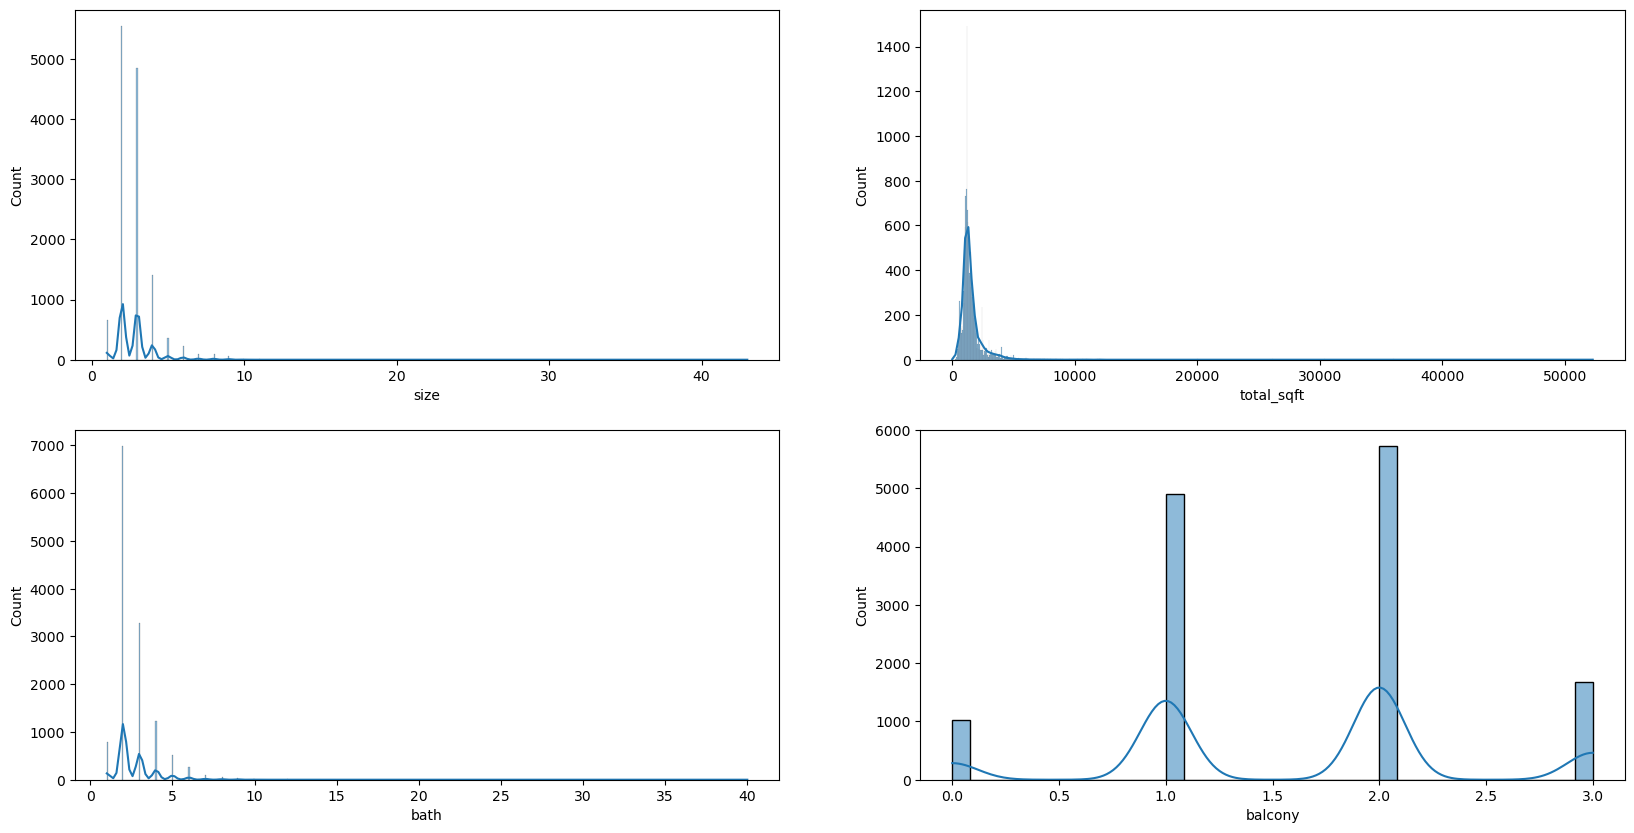

In [472]:
plt.subplot(2,2,1)
sns.histplot(df6['size'], kde=True)

plt.subplot(2,2,2)
sns.histplot(df6['total_sqft'], kde=True)

plt.subplot(2,2,3)
sns.histplot(df6['bath'], kde=True)

plt.subplot(2,2,4)
sns.histplot(df6['balcony'], kde=True)

<h3> Guassian Transformation</h3>
<p> Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance</p>

<ol>
<li>logarithmic transformation</li>
<li>reciprocal transformation</li>
<li>square root transformation</li>
<li>exponential transformation (more general, you can use any exponent)</li>
<li>boxcox transformation</li>
</ol>

# by logarithmic transformation

<Axes: xlabel='size_log', ylabel='Count'>

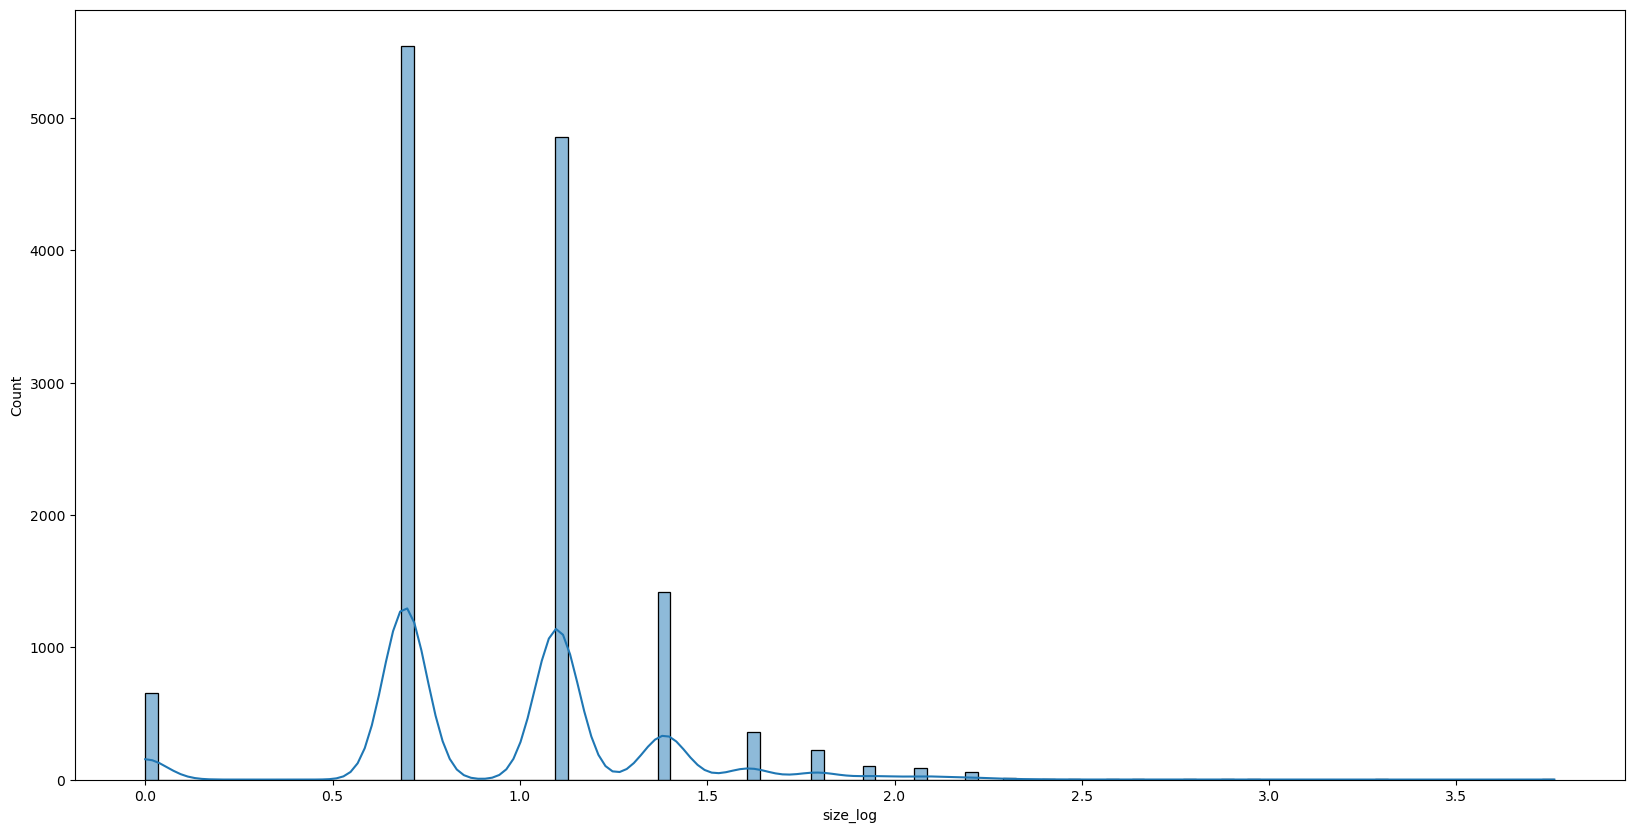

In [478]:
df6['size_log'] = np.log(df6['size'])
sns.histplot(df6['size_log'],kde=True)

# 2) reciprocal transformation¶

<Axes: xlabel='size_reciprocal', ylabel='Count'>

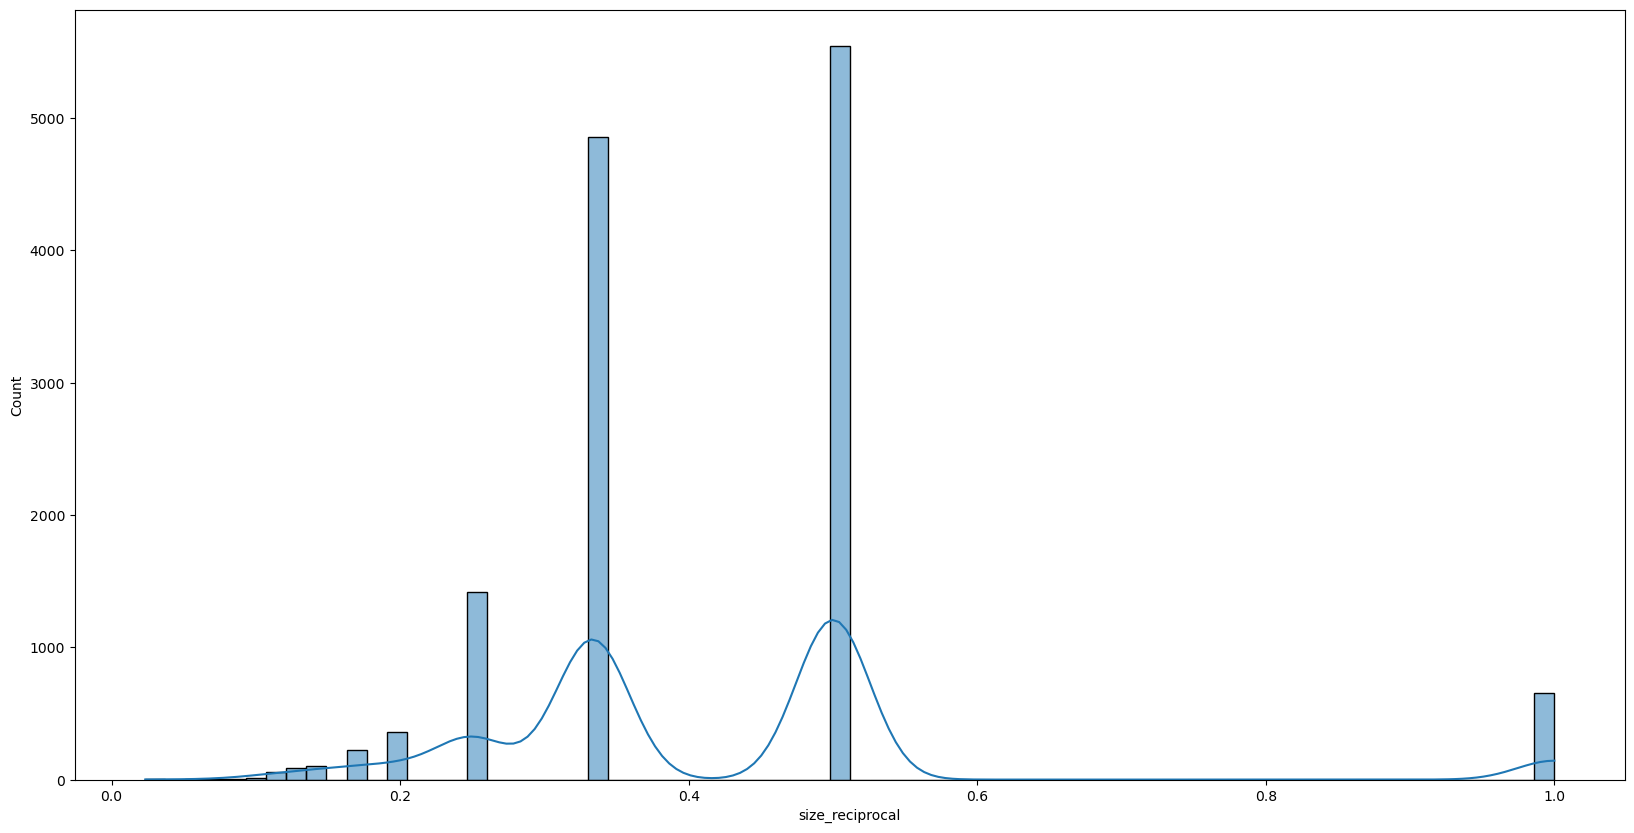

In [479]:
df6['size_reciprocal'] = 1/df6['size']
sns.histplot(df6['size_reciprocal'],kde=True)


# 3) square root transformation

<Axes: xlabel='size_square_root', ylabel='Count'>

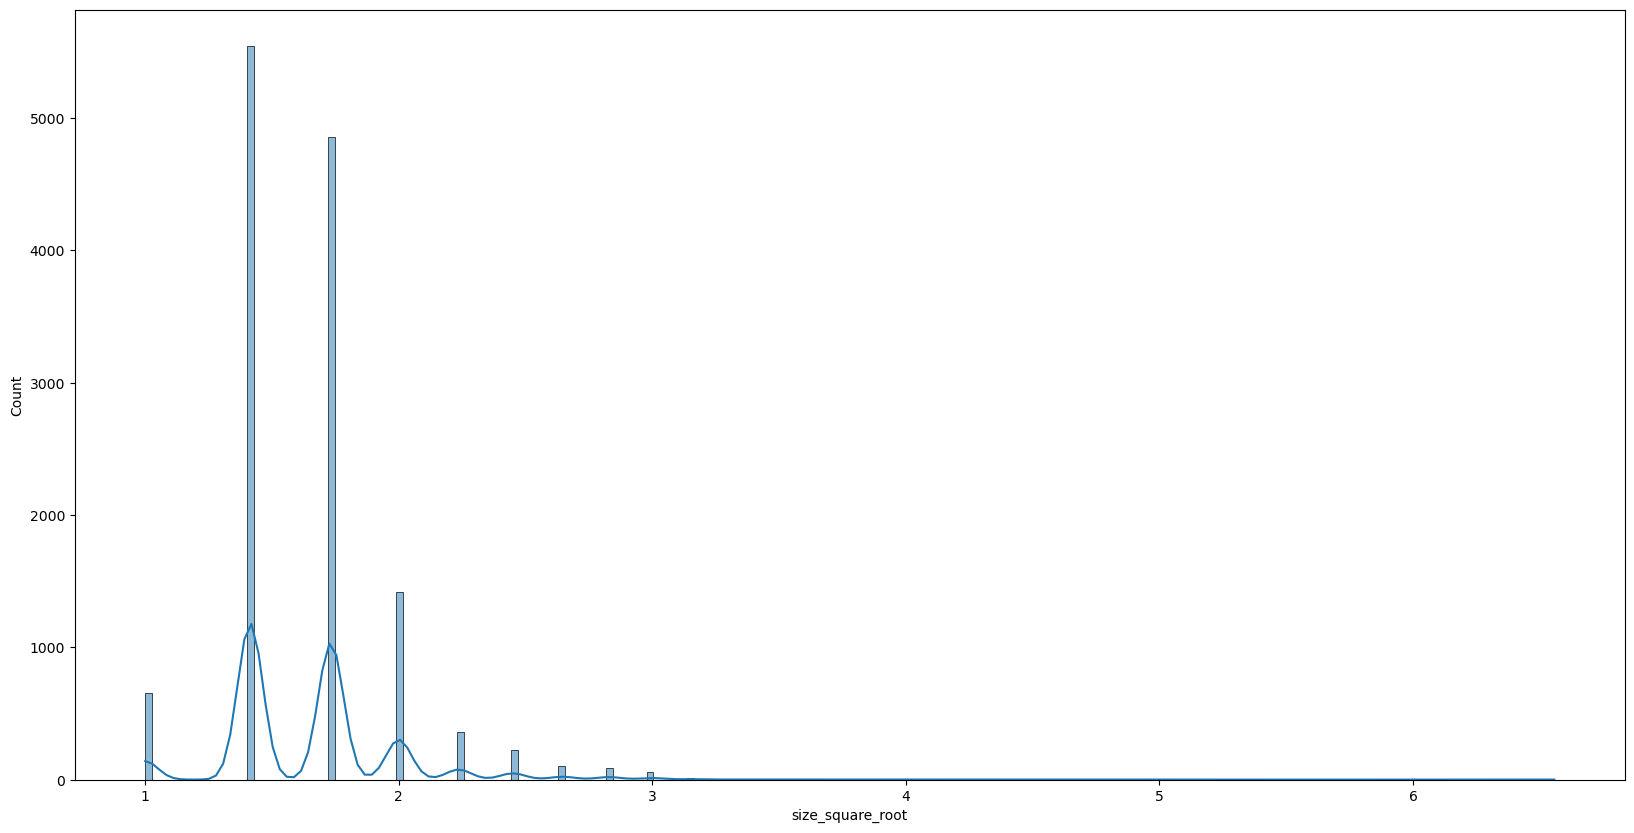

In [480]:
df6['size_square_root'] = df6['size'] **(1/2)
sns.histplot(df6['size_square_root'],kde=True)


# 4) exponential transformation

<Axes: xlabel='size_exponencial', ylabel='Count'>

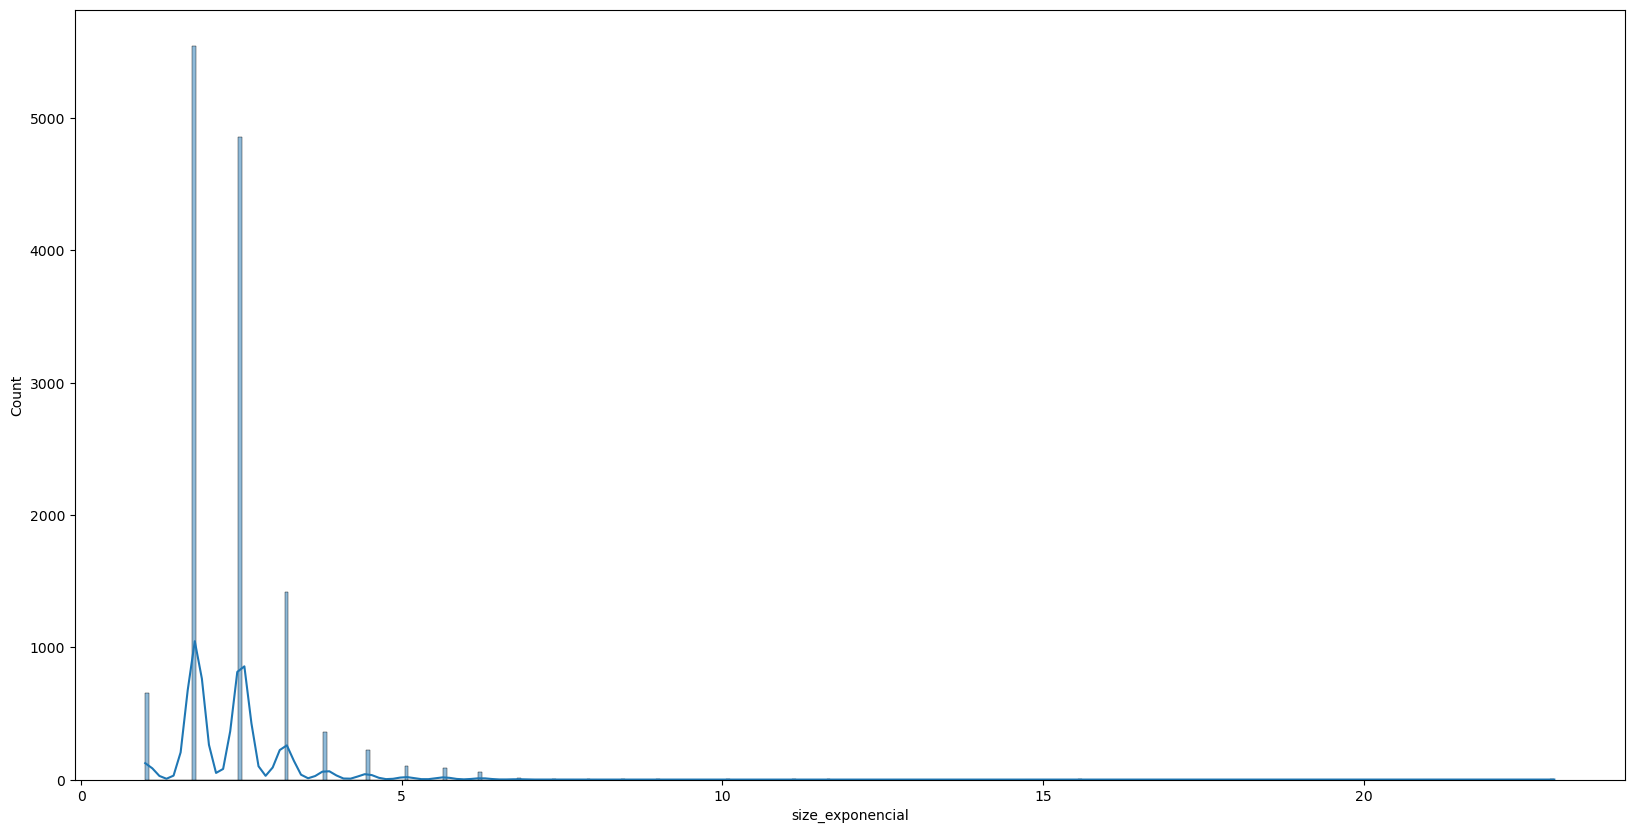

In [481]:
df6['size_exponencial'] = df6['size'] **(1/1.2)
sns.histplot(df6['size_exponencial'],kde=True)


# 5) boxcox transformation